In [19]:
import pandas as pd
import numpy as np
train = pd.read_csv('data/train_data_for_random_forest.csv')
test = pd.read_csv('data/new_test_for_random_forest.csv')

In [20]:
train = train.drop(axis=0, columns=['id'])

train = train.drop(axis=0, columns=['ni.age'])
train = train.drop(axis=0, columns=['n.children'])

test = test.drop(axis=0, columns=['ni.age'])
test = test.drop(axis=0, columns=['n.children'])


In [21]:
train = train[train['cancel'] >= 0]

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cancel', ylabel='count'>

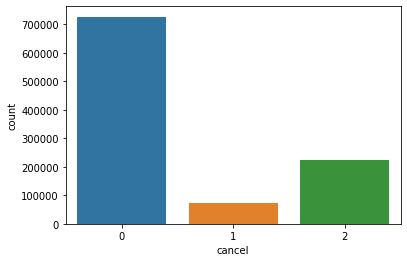

In [22]:
import seaborn as sns
sns.countplot(train['cancel'])

<AxesSubplot:>

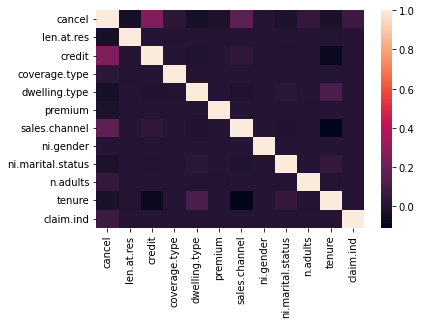

In [23]:
corr = train.corr()
sns.heatmap(corr)

In [24]:
X = train.drop('cancel',axis=1)
y = train['cancel']

In [25]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

In [26]:
# Define SMOTE-Tomek Links
resample=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
X, y = resample.fit_resample(X, y)

In [27]:
from sklearn.model_selection import train_test_split
train_x, val_x,train_y, val_y = train_test_split(X,y,test_size=0.2)

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(train_x, train_y)
#rfc.fit(X, y)
rfc_predict = rfc.predict(val_x)
print('Accuracy score:', accuracy_score(val_y, rfc_predict))

Accuracy score: 0.7676143073873617


In [29]:
from sklearn.metrics import classification_report

print(classification_report(val_y,rfc_predict))

              precision    recall  f1-score   support

           0       0.74      0.83      0.78    143484
           1       0.81      0.86      0.84    145484
           2       0.75      0.62      0.68    145409

    accuracy                           0.77    434377
   macro avg       0.77      0.77      0.76    434377
weighted avg       0.77      0.77      0.76    434377



In [30]:
test.head()

,id,tenure,claim.ind,n.adults,ni.gender,ni.marital.status,premium,sales.channel,coverage.type,dwelling.type,len.at.res,credit
0,7583,5.0,0.0,1.0,0.0,1.0,913.623201,0.0,2.0,0.0,18.0,1.0
1,7584,15.0,1.0,1.0,0.0,1.0,1018.426114,1.0,0.0,2.0,15.0,1.0
2,7585,1.0,1.0,3.0,1.0,1.0,928.418533,0.0,1.0,1.0,13.0,1.0
3,7586,12.0,0.0,4.0,1.0,0.0,877.649917,0.0,1.0,1.0,19.0,0.0
4,7587,11.0,0.0,1.0,0.0,1.0,947.281913,0.0,0.0,1.0,18.0,0.0


In [31]:
train.head()

,cancel,len.at.res,credit,coverage.type,dwelling.type,premium,sales.channel,ni.gender,ni.marital.status,n.adults,tenure,claim.ind
0,0,18.000000,0,2,0,950.507336,0,0,0.0,2.0,15.0,0.0
1,0,17.000000,1,0,1,909.346046,0,0,1.0,5.0,15.0,0.0
2,0,14.000000,0,0,2,897.084502,1,1,0.0,1.0,14.0,0.0
3,0,24.366136,0,0,2,979.039007,1,1,0.0,5.0,22.0,1.0
4,0,16.000000,0,2,2,932.379027,0,1,1.0,2.0,4.0,0.0


In [32]:
copy = pd.DataFrame(test)
test = test.drop(axis=0, columns=['id'])
rfc_predict = rfc.predict(test)
submit = pd.DataFrame({'id': copy.id, 'Predicted': rfc_predict})
submit.to_csv('data/submit7.csv', index=False)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [33]:
np.all(np.isfinite(test))


True

In [34]:
np.any(np.isnan(test))

False

In [35]:
test.isnull().sum()

tenure               0
claim.ind            0
n.adults             0
ni.gender            0
ni.marital.status    0
premium              0
sales.channel        0
coverage.type        0
dwelling.type        0
len.at.res           0
credit               0
dtype: int64